# Importing Libraries

In [184]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import LabelEncoder

!pip install unidecode
!pip install openpyxl

import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
from time import time 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, Flatten, Conv1D, BatchNormalization
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K
import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [185]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/ kutub/7004OTT Content Reviews.csv', encoding='UTF-8')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Text,Label
0,"পুরাই অস্থির!!! ""সাকিল, চট্টগ্রাম",1
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ছিল ওনার জন্য ক...,1
2,পুরাই আগুন অনেক দিনের অপেক্ষায় আছি এই কাজ টা দ...,1
3,"ইন্টারেস্টিং স্টোরি,অভিনয়, সিনেমেটোগ্রাফিও জোস",1
4,এট লিস্ট অনন্ত জলীল এর ১০০ কোটি টাকার মুভির ট্...,1
...,...,...
6998,প্রথমে মিষ্টি এরপর পরকিয়া,2
6999,বৌদি কে লাগাবে,2
7000,এই সিরিজ টা পুরো কোথায় পাওয়া যাবে,0
7001,কাহিনীর গল্প খুব বাজে,2


In [186]:
# Checking for missing values

data.isnull().values.any()

False

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


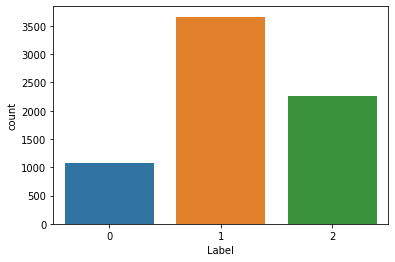

In [187]:
sns.countplot(data['Label'])

3 polarities in the Dataset

# Data Preprocessing

1. Text to Word
2. Removing Punctuations and Special Characters

In [188]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations
                               
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)
    
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [189]:
data['Text'] = data.Text.apply(lambda x: preprocessing(str(x)))

In [190]:
data.reset_index(drop=True, inplace=True)


In [191]:
data.drop_duplicates(inplace=True)
data

,Text,Label
0,পুরাই অস্থির সাকিল চট্টগ্রাম,1
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ছিল ওনার জন্য ক...,1
2,পুরাই আগুন অনেক দিনের অপেক্ষায় আছি এই কাজ টা দ...,1
3,ইন্টারেস্টিং স্টোরিঅভিনয় সিনেমেটোগ্রাফিও জোস,1
4,এট লিস্ট অনন্ত জলীল এর কোটি টাকার মুভির ট্রেই...,1
...,...,...
6998,প্রথমে মিষ্টি এরপর পরকিয়া,2
6999,বৌদি কে লাগাবে,2
7000,এই সিরিজ টা পুরো কোথায় পাওয়া যাবে,0
7001,কাহিনীর গল্প খুব বাজে,2


In [192]:
print("Total Reviews:",len(data),
      "\nTotal Positive Reviews:",len(data[data.Label ==1]),
      "\nTotal Negative Reviews:",len(data[data.Label==2]),
      "\nTotal Neutral Reviews:",len(data[data.Label ==0]))


Total Reviews: 6577 
Total Positive Reviews: 3373 
Total Negative Reviews: 2170 
Total Neutral Reviews: 1034


In [193]:
stopWod =pd.read_excel('/content/drive/MyDrive/ kutub/stopwords_bangla (1).xlsx')
stop = stopWod['words'].tolist()

In [194]:
def stopwordRemoval(text):    
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stop]
    
    out=' '.join(stm)
    
    return str(out)

In [195]:
data['Text'] = data.Text.apply(lambda x: stopwordRemoval(str(x)))
data

,Text,Label
0,পুরাই অস্থির সাকিল চট্টগ্রাম,1
1,নাজিফা তুষি আপু অবিনয় বেস্ট ওনার কান্না আসছে,1
2,পুরাই আগুন দিনের অপেক্ষায় আছি দেখার,1
3,ইন্টারেস্টিং স্টোরিঅভিনয় সিনেমেটোগ্রাফিও জোস,1
4,এট লিস্ট অনন্ত জলীল টাকার মুভির ট্রেইলার হাজার...,1
...,...,...
6998,প্রথমে মিষ্টি এরপর পরকিয়া,2
6999,বৌদি লাগাবে,2
7000,সিরিজ পুরো কোথায় পাওয়া,0
7001,কাহিনীর গল্প বাজে,2


In [196]:
#make sure to turn on internet on your kernel
#importing stemmer
!pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer
## stemmer function
def stem_text (x):
  stmr = stemmer.BanglaStemmer()
  words=x.split(' ')
  stm = stmr.stem(words)
  words=(' ').join(stm)
  return words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [197]:
data['Text']=data['Text'].apply(stem_text)
data

Streaming output truncated to the last 5000 lines.
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules

,Text,Label
0,পুরা অস্থির সাকিল চট্টগ্রাম,1
1,নাজিফা তুষি আপু অবিনয় বেস্ট ওন কান্না আস,1
2,পুরা আগুন দিন অপেক্ষায় আছি দেখ,1
3,ইন্টারেস্টিং স্টোরিঅভিনয় সিনেমেটোগ্রাফি জোস,1
4,এট লিস্ট অনন্ত জলীল টাকা মুভির ট্রেইল হাজারগুন...,1
...,...,...
6998,প্রথমে মিষ্ এরপর পরকিয়া,2
6999,বৌদি লাগাবে,2
7000,সিরিজ পুরো কোথায় পাওয়া,0
7001,কাহিনীর গল্প বাজে,2


In [198]:
pcomment = data[data.Label == 1][:3373]
pcomment


,Text,Label
0,পুরা অস্থির সাকিল চট্টগ্রাম,1
1,নাজিফা তুষি আপু অবিনয় বেস্ট ওন কান্না আস,1
2,পুরা আগুন দিন অপেক্ষায় আছি দেখ,1
3,ইন্টারেস্টিং স্টোরিঅভিনয় সিনেমেটোগ্রাফি জোস,1
4,এট লিস্ট অনন্ত জলীল টাকা মুভির ট্রেইল হাজারগুন...,1
...,...,...
6848,দিক গুলো মন্দ ঢুকছেন প্রথমে মাথায় ঢুক বাঁধুনি ...,1
6849,নাম দাখ ভেবেছি ভিউস কলক মানুষ যত রোমান্টিক দেখ...,1
6978,পাপ হইচই বেস্ট সিরিজ,1
6989,বেস্ট অ্যাডিয়েন্স সেরার সেরাটা আস মন্দ এক টপ ...,1


In [199]:
ncomment = data[data.Label == 2]
ncomment


,Text,Label
33,টাক কপিপেস্ট চালায় ক্রেডিট না,2
37,জাহান্নামী,2
41,ধীরগতির মজা পাই না সময় নষ্ট হই,2
50,বাংলা সিনেম কথা লাভ,2
57,চাল একুরিয়ামে মাছ আপাতত মাছ সিয়াম রান্না দাও,2
...,...,...
6997,সিনেমা বাস্তব কত আলাদা গুলো দেখলে বোজা,2
6998,প্রথমে মিষ্ এরপর পরকিয়া,2
6999,বৌদি লাগাবে,2
7001,কাহিনীর গল্প বাজে,2


In [200]:
nuecomment = data[data.Label == 0]
nuecomment


,Text,Label
10,আগুন লাগা দিলো ঝলকে,0
15,বাংলাদেশ কিছুর আশা,0
24,অতি শ্রীগ্র শ্রীগ্র নিশো ভাই সিনেমায় দেখবো,0
27,এটা আফরান নিশো বস শখ চুল কাট ফেলেছিল অপেক্ষ,0
31,এটা আসবে,0
...,...,...
6990,গর্বিত বাঙালী আমরা হৃদয় ছুত,0
6992,মুভি গুলো বোঝায় বাংলা ফিল্ম ইন্ডাস্ট্রি এগোচ্,0
6993,বিয় ঠিক বিয় মাছ ব্যাং যায়,0
6996,মেয়ে জীবন অদ্ভুত না বাবামা কোলে পিঠে এক মেয়ে...,0


In [201]:
data = pd.concat([pcomment,ncomment,nuecomment], axis = 0)


In [202]:
train_sentences_ott=data['Text'].values
train_labels_ott=data['Label'].values

In [203]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot

In [204]:
# oversample = SMOTE()
# train_sentences_ott,train_labels_ott = oversample.fit_resample(training_sentences_ott, train_labels_ott)

In [205]:
#enc = LabelEncoder()
#dataset_cricket['Polarity'] = enc.fit_transform(dataset_cricket['Polarity'])


Now we will prepare the dataset to train in the proposed CNN network.So, we have to convert all Sentences into a numpy Array.

We have divided the training and testing data into 80/20 ratio.

We have converted the sentiment values into one hot encodings for the convenient use in model training.

In [206]:
train1, test1 = train_test_split(data,random_state=69, test_size=0.2)
training_sentences_ott = []
testing_sentences_ott = []



train_sentences_ott=train1['Text'].values
train_labels_ott=train1['Label'].values
for i in range(train_sentences_ott.shape[0]): 
    #print(train_sentences[i])
    x=str(train_sentences_ott[i])
    training_sentences_ott.append(x)
    
training_sentences_ott=np.array(training_sentences_ott)





test_sentences_ott=test1['Text'].values
test_labels_ott=test1['Label'].values

for i in range(test_sentences_ott.shape[0]): 
    x=str(test_sentences_ott[i])
    testing_sentences_ott.append(x)
    
testing_sentences_ott=np.array(testing_sentences_ott)


train_labels_ott=tf.keras.utils.to_categorical(train_labels_ott)


test_labels_ott=tf.keras.utils.to_categorical(test_labels_ott)
print("Training Set Length: "+str(len(train1)))
print("Testing Set Length: "+str(len(test1)))
print("training_sentences shape: "+str(training_sentences_ott.shape))
print("testing_sentences shape: "+str(testing_sentences_ott.shape))
print("train_labels shape: "+str(train_labels_ott.shape))
print("test_labels shape: "+str(test_labels_ott.shape))

Training Set Length: 5261
Testing Set Length: 1316
training_sentences shape: (5261,)
testing_sentences shape: (1316,)
train_labels shape: (5261, 3)
test_labels shape: (1316, 3)


In [207]:
print(training_sentences_ott[1])
print(train_labels_ott[1])

দিরিল লাস্ট সিজন ডাবিং চাই
[0. 1. 0.]


Now, we will predefine some variables.

vocab_size is the maximum vocabulary length of Tokenizer.

KERAS tokenzier allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf.

We will be tokenizing my dataset with this class here. We have did this tokenization so that it can be later used to generate Embeddings.

The main advantage of word embedding is that words that share a similar context can be represented close to each other in the vector space. Thus, vectors carry a sense of semantic of a word.

We have predefined the embedding dimension as 300(embedding_dim).

max_length is the sentence maximum length.

trunc_type is the truncation type.

oov_token is the token for the words that are not present in the corpus.oov means out of vocabulary.

In [208]:
vocab_size = len(training_sentences_ott)+1
embedding_dim = 100
max_length = 100
trunc_type='post'
oov_tok = "<OOV>"

In [209]:
print(training_sentences_ott.shape)
print(train_labels_ott.shape)

(5261,)
(5261, 3)


At first, we will tokenize and then, we will be padding the sequences. We have used tokenizer only on training dataset to see how the model performs on unseen words.

In [210]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences_ott)
word_index = tokenizer.word_index
print(len(word_index))
print("Word index length:"+str(len(tokenizer.word_index)))
sequences = tokenizer.texts_to_sequences(training_sentences_ott)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)


test_sequences = tokenizer.texts_to_sequences(testing_sentences_ott)
testing_padded = pad_sequences(test_sequences,maxlen=max_length)

8787
Word index length:8787


In [211]:
print("Sentence :--> \n")
print(training_sentences_ott[2]+"\n")
print("Sentence Tokenized and Converted into Sequence :--> \n")
print(str(sequences[2])+"\n")
print("After Padding the Sequence with padding length 100 :--> \n")
print(padded[2])

Sentence :--> 

পায়েল মাল

Sentence Tokenized and Converted into Sequence :--> 

[334, 275]

After Padding the Sequence with padding length 100 :--> 

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 334 275]


In [212]:
print("Padded shape(training): "+str(padded.shape))
print("Padded shape(testing): "+str(testing_padded.shape))

Padded shape(training): (5261, 100)
Padded shape(testing): (1316, 100)


# Model Creation

At first, we have created embeddings from the text.

In [213]:
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def f1_score(y_true, y_pred):
    pr = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    f1_score = 2 * (pr * rec) / (pr + rec)
    return f1_score

In [214]:
# padded
train_labels_ott

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [215]:
# raise NotImplementedError()

In [216]:
# from tensorflow.keras.layers import GlobalMaxPooling1D

detection=Sequential()

detection.add(Embedding(vocab_size, embedding_dim, input_length=max_length))

#1 -convolutional layer-1
detection.add(Conv1D(64 ,kernel_size=3))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
# detection.add(GlobalMaxPooling1D())
detection.add(Dropout(0.1))

#2 -convolutional layer-2
detection.add(Conv1D(96,kernel_size=3))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
# detection.add(GlobalMaxPooling1D())
# detection.add(Dropout(0.2))

#2 -convolutional layer-2
detection.add(Conv1D(128,kernel_size=3))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
# detection.add(GlobalMaxPooling1D())
detection.add(Dropout(0.15))


# #2 -convolutional layer-2
# detection.add(Conv1D(256,kernel_size=3))
# detection.add(BatchNormalization())
# detection.add(Activation('relu'))
# # detection.add(MaxPooling2D(pool_size=(2,2)))
# # detection.add(GlobalMaxPooling1D())
# detection.add(Dropout(0.2))

# #3 -convolutional layer-3
# detection.add(Conv1D(384,kernel_size=3))
# detection.add(BatchNormalization())
# detection.add(Activation('relu'))
# # detection.add(GlobalMaxPooling1D())
# # detection.add(MaxPooling2D(pool_size=(2,2)))
# # detection.add(UpSampling2D(input_shape=(512, 3, 3)))
# detection.add(Dropout(0.2))

# #3 -convolutional layer-3
# detection.add(Conv1D(512,kernel_size=3))
# detection.add(BatchNormalization())
# detection.add(Activation('relu'))
# # detection.add(GlobalMaxPooling1D())
# # detection.add(MaxPooling2D(pool_size=(2,2)))
# # detection.add(UpSampling2D(input_shape=(512, 3, 3)))
# detection.add(Dropout(0.3))


# detection.add(Flatten())
# detection.add(Dense(512))
# detection.add(BatchNormalization())
# detection.add(Activation('relu'))

# detection.add(Flatten())
# detection.add(Dense(256))
# detection.add(BatchNormalization())
# detection.add(Activation('relu'))

detection.add(Flatten())
detection.add(Dense(128))
detection.add(BatchNormalization())
detection.add(Activation('relu'))

detection.add(Flatten())
detection.add(Dense(64))
detection.add(BatchNormalization())
detection.add(Activation('relu'))

detection.add(Dense(3,activation='softmax'))
optimum=Adam(lr=0.00001)
detection.summary()
detection.compile(optimizer=optimum,loss='binary_crossentropy',metrics=['accuracy', precision, recall])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 100)          526200    
                                                                 
 conv1d_6 (Conv1D)           (None, 98, 64)            19264     
                                                                 
 batch_normalization_10 (Bat  (None, 98, 64)           256       
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 98, 64)            0         
                                                                 
 dropout_4 (Dropout)         (None, 98, 64)            0         
                                                                 
 conv1d_7 (Conv1D)           (None, 96, 96)            18528     
                                                      

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Dividing training data to training and validation.

In [217]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(padded, train_labels_ott, test_size=0.15, shuffle= True) #data, label

In [218]:
model_ott = detection.fit(x_train, y_train,shuffle=True,epochs=60,batch_size=4,validation_data=(x_valid,y_valid))#,use_multiprocessing=True, workers=8)
# model_ott=detection.fit(padded,train_labels_ott,shuffle=True,epochs=30,batch_size=16,validation_data=(testing_padded,test_labels_ott),use_multiprocessing=True, workers=8) #input, output

Epoch 1/60
1118/1118 [==============================] - 42s 36ms/step - loss: 0.7915 - accuracy: 0.2485 - precision: 0.2268 - recall: 0.1650 - val_loss: 0.8128 - val_accuracy: 0.2190 - val_precision: 0.2121 - val_recall: 0.1755
Epoch 2/60
1118/1118 [==============================] - 39s 35ms/step - loss: 0.7419 - accuracy: 0.2794 - precision: 0.2572 - recall: 0.1647 - val_loss: 0.7542 - val_accuracy: 0.2608 - val_precision: 0.2327 - val_recall: 0.1629
Epoch 3/60
1118/1118 [==============================] - 39s 35ms/step - loss: 0.7005 - accuracy: 0.3270 - precision: 0.3002 - recall: 0.1734 - val_loss: 0.7116 - val_accuracy: 0.3177 - val_precision: 0.3018 - val_recall: 0.1705
Epoch 4/60
1118/1118 [==============================] - 39s 35ms/step - loss: 0.6709 - accuracy: 0.3809 - precision: 0.3665 - recall: 0.1986 - val_loss: 0.6877 - val_accuracy: 0.3418 - val_precision: 0.3283 - val_recall: 0.1780
Epoch 5/60
1118/1118 [==============================] - 40s 36ms/step - loss: 0.6498 - a

In [219]:
score = detection.evaluate(x_valid, y_valid, verbose=1)

25/25 [==============================] - 0s 16ms/step - loss: 0.4850 - accuracy: 0.6532 - precision: 0.6700 - recall: 0.6127


In [220]:
# Model Performance

print("Accuracy: %.2f%%" % (score[1]*100))

Accuracy: 65.32%


In [221]:
detection.evaluate(x=testing_padded,y=test_labels_ott,verbose=1)
# loss: - accuracy: - recall:  - precision:

42/42 [==============================] - 1s 15ms/step - loss: 0.4590 - accuracy: 0.6641 - precision: 0.6880 - recall: 0.6354


[0.458972692489624, 0.6641337275505066, 0.6880308389663696, 0.6354166865348816]

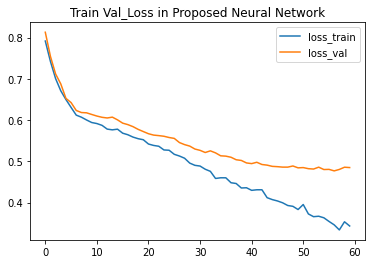

<Figure size 432x288 with 0 Axes>

In [222]:
plt.plot(model_ott.history['loss'], label='loss_train')
plt.plot(model_ott.history['val_loss'], label='loss_val')
# plt.plot(mod.history['accuracy'], label='acc_train')
# plt.plot(mod.history['val_accuracy'], label='acc_val')
plt.legend()
plt.title('Train Val_Loss in Proposed Neural Network')
plt.show()
plt.savefig('LossVal_Loss')

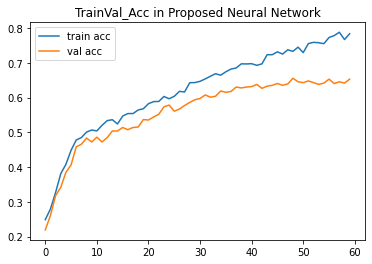

<Figure size 432x288 with 0 Axes>

In [223]:
plt.plot(model_ott.history['accuracy'], label='train acc')
plt.plot(model_ott.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('TrainVal_Acc in Proposed Neural Network')
plt.show()
plt.savefig('AccVal_Acc')

In [224]:
from keras.layers import LSTM

In [225]:
# Neural Network architecture

lstm_model = Sequential()
embedding_layer = Embedding(vocab_size, embedding_dim, input_length=max_length , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(3, activation='softmax'))

In [226]:
# Model compiling

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 100)          526200    
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 dense_16 (Dense)            (None, 3)                 387       
                                                                 
Total params: 643,835
Trainable params: 117,635
Non-trainable params: 526,200
_________________________________________________________________
None


In [227]:
# Model Training

lstm_model_history = lstm_model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1, validation_data=(x_valid,y_valid))

Epoch 1/100
35/35 [==============================] - 13s 315ms/step - loss: 1.0244 - acc: 0.5048 - val_loss: 1.0198 - val_acc: 0.4924
Epoch 2/100
35/35 [==============================] - 10s 299ms/step - loss: 0.9903 - acc: 0.5066 - val_loss: 0.9935 - val_acc: 0.5000
Epoch 3/100
35/35 [==============================] - 10s 298ms/step - loss: 0.9810 - acc: 0.5153 - val_loss: 0.9884 - val_acc: 0.4987
Epoch 4/100
35/35 [==============================] - 10s 299ms/step - loss: 0.9651 - acc: 0.5173 - val_loss: 0.9705 - val_acc: 0.5101
Epoch 5/100
35/35 [==============================] - 10s 297ms/step - loss: 0.9493 - acc: 0.5319 - val_loss: 0.9526 - val_acc: 0.5418
Epoch 6/100
35/35 [==============================] - 10s 297ms/step - loss: 0.9361 - acc: 0.5397 - val_loss: 0.9381 - val_acc: 0.5519
Epoch 7/100
35/35 [==============================] - 12s 344ms/step - loss: 0.9187 - acc: 0.5502 - val_loss: 0.9179 - val_acc: 0.5532
Epoch 8/100
35/35 [==============================] - 10s 299ms

In [236]:
# Predictions on the Test Set

score = lstm_model.evaluate(x_valid, y_valid, verbose=1)

25/25 [==============================] - 1s 49ms/step - loss: 1.1328 - acc: 0.6291


In [237]:
print("Accuracy: %.2f%%" % (score[1]*100))

Accuracy: 62.91%


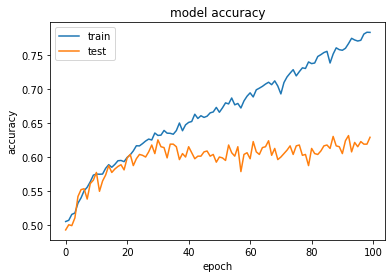

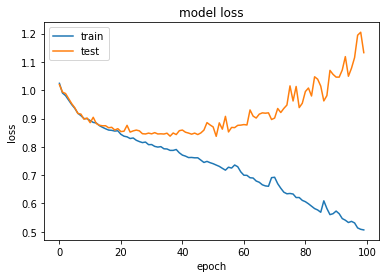

In [238]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [240]:
ann = Sequential()

In [241]:
#Add the input layer and the first hidden layer
ann.add(Dense(units = 64,activation='relu',input_dim = max_length))
#Add the second hidden layer
ann.add(Dense(units = 64,activation='relu'))
#Add the output layer
ann.add(Dense(units = 3,activation='softmax'))

In [242]:
#Compile the ANN
ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
ann.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                6464      
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 3)                 195       
                                                                 
Total params: 10,819
Trainable params: 10,819
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_ann=ann.fit(x_train,y_train,validation_data=(x_valid,y_valid),batch_size=200,epochs=100)

In [ ]:
score = ann.evaluate(x_valid, y_valid, verbose=1)
print("Accuracy: %.2f%%" % (score[1]*100))

In [ ]:
plt.plot(model_ann.history['loss'], label='loss_train')
plt.plot(model_ann.history['val_loss'], label='loss_val')
# plt.plot(mod.history['accuracy'], label='acc_train')
# plt.plot(mod.history['val_accuracy'], label='acc_val')
plt.legend()
plt.title('Train Val_Loss in Proposed Neural Network')
plt.show()
plt.savefig('LossVal_Loss')

In [ ]:
plt.plot(model_ann.history['accuracy'], label='train acc')
plt.plot(model_ann.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('TrainVal_Acc in Proposed Neural Network')
plt.show()
plt.savefig('AccVal_Acc')

In [ ]:

from tensorflow.keras.layers import SimpleRNN

# define the model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))#24--86
model.add(SimpleRNN(24, return_sequences=False)) #24--86
model.add(Dense(3, activation='softmax')) #2--86%

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #optimizer='rmsprop' --86

# summarize the model
print(model.summary())

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import SimpleRNN
# from tensorflow.keras.layers import Flatten
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# fit the model RNN
model_rnn=model.fit(x_train,y_train,epochs=100,validation_data=(x_valid,y_valid), verbose=1 ,callbacks=[early_stop])

In [ ]:
# Predictions on the Test Set

score = model.evaluate(x_valid, y_valid, verbose=1)
print("Accuracy: %.2f%%" % (score[1]*100))

In [ ]:
plt.plot(model_rnn.history['loss'], label='loss_train')
plt.plot(model_rnn.history['val_loss'], label='loss_val')
# plt.plot(mod.history['accuracy'], label='acc_train')
# plt.plot(mod.history['val_accuracy'], label='acc_val')
plt.legend()
plt.title('Train Val_Loss in Proposed Neural Network')
plt.show()
plt.savefig('LossVal_Loss')

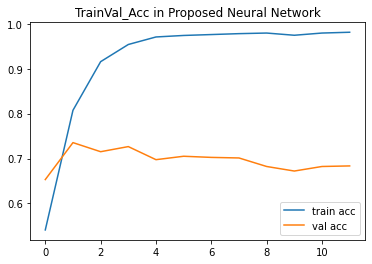

<Figure size 432x288 with 0 Axes>

In [235]:
plt.plot(model_rnn.history['accuracy'], label='train acc')
plt.plot(model_rnn.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('TrainVal_Acc in Proposed Neural Network')
plt.show()
plt.savefig('AccVal_Acc')